__сегментация изображения с помощью кластеризации пространства цветов__

Евгений Борисов borisov.e@solarl.ru

In [1]:
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

## GMM кластеризация

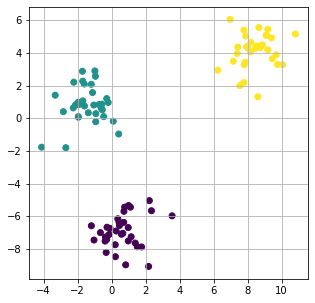

In [2]:
from sklearn.datasets import make_blobs

X,y = make_blobs()
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,)

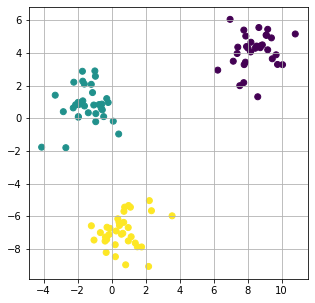

In [3]:
gm = GaussianMixture(n_components=3)

r = gm.fit_predict(X)

plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=r,)

## сегментатор изображений

In [4]:
!ls ../data/gmm-img-segm

04.png	1000_s.jpg  1002.png  DSC100126975_s.png  w1023_s.jpeg


In [5]:
# test_image_file = '../data/gmm-img-segm/04.png'
# test_image_file = '../data/gmm-img-segm/1002.png'
test_image_file = '../data/gmm-img-segm/1000_s.jpg'
# test_image_file = '../data/gmm-img-segm/DSC100126975_s.png'
# test_image_file = '../data/gmm-img-segm/w1023_s.jpeg'

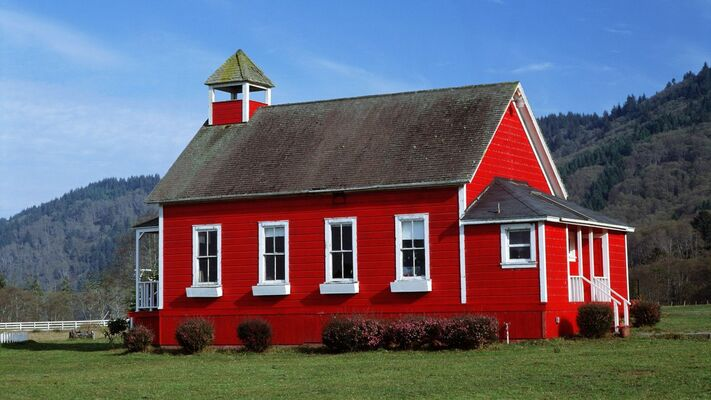

In [6]:
from PIL import Image
import numpy as np

img = Image.open(test_image_file) 
img

In [7]:
n_components = 8 # количество кластеров

In [8]:
# на карте результата mask 
# заменяем номер кластера 
# на преобладающий цвет кластера 
def colorize(X,mask):
    h,w,c = X.shape
    # цвет точки и номер кластера
    point_color = np.hstack([
            X.reshape([h*w,c])
            ,mask.reshape([h*w,1])
        ])

    # преобладающий цвет по кластерам
    cluster_color = np.vstack([ 
            np.median(point_color[ point_color[:,-1]==k],axis=0) 
            for k in range(n_components) 
        ]).astype(int)

    # словарь номер кластера - цвет
    cluster_color = { x[-1]:x[:-1] for x in cluster_color }

    # заменяем номер кластера на цвет в матрице результата
    return np.array([ cluster_color[m] for m in mask.reshape([h*w]) ]).reshape([h,w,c])

In [9]:
def img_segment(img,n_components=n_components,cspace='L'):
    
    X = np.array(img.convert(cspace))
    
    if len(X.shape)==3:
        h,w,c = X.shape
    elif len(X.shape)==2:
        h,w = X.shape
        c=1
    else:
        print('error: image matrix shape unknown',X.shape)
        return
    
    mask = GaussianMixture(n_components=n_components)\
            .fit_predict(X.reshape([h*w,c]))\
            .reshape([h,w])
   
    X_rgb = np.array(img.convert('RGB'))
    X_mask = colorize(X_rgb,mask)

    plt.figure(figsize=(15,15))
    plt.axis(False)
    plt.imshow( X_mask,cmap='gray', )

## GRAYSCALE

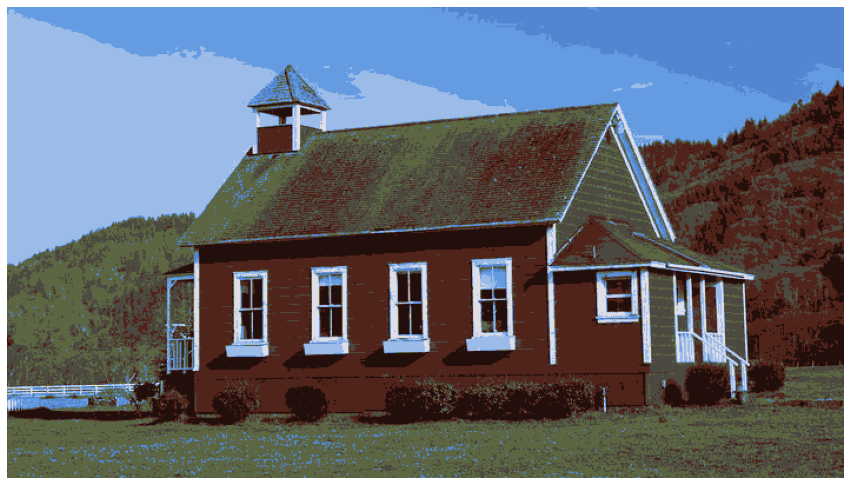

In [10]:
img_segment(img)

## RGB

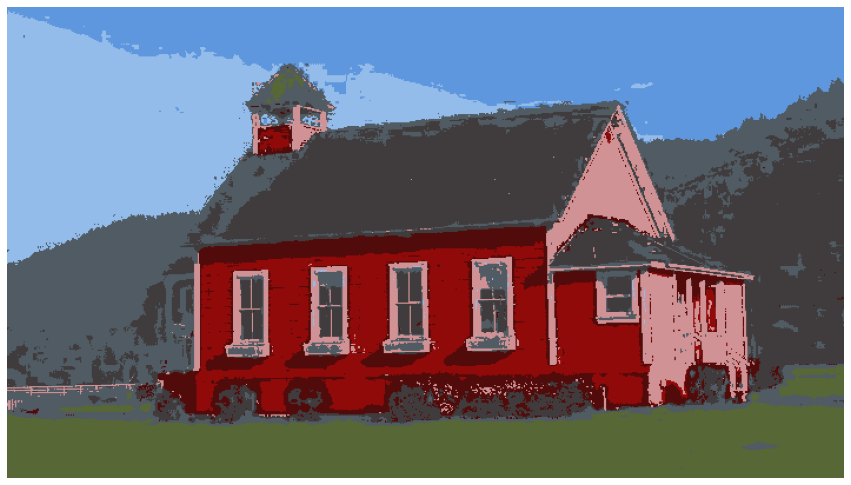

In [11]:
img_segment(img,cspace='RGB')

##  HSV

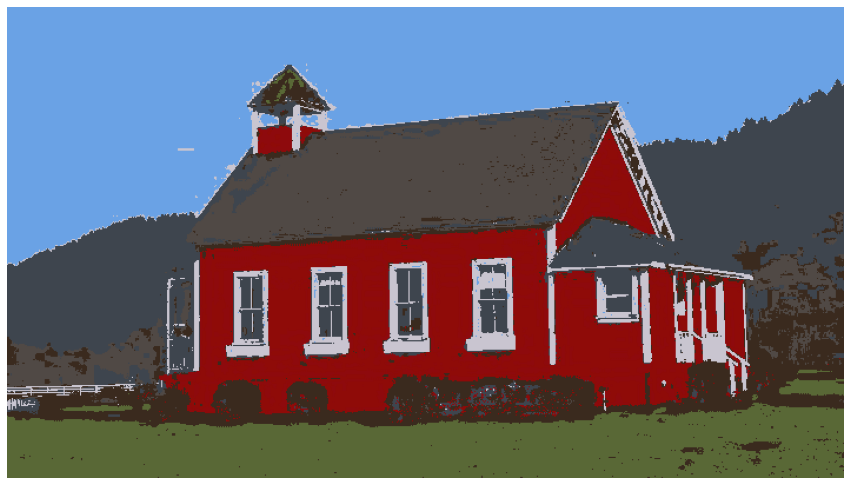

In [12]:
# Hue, Saturation, Value — тон, насыщенность, яркость
img_segment(img,cspace='HSV')

## CMYK

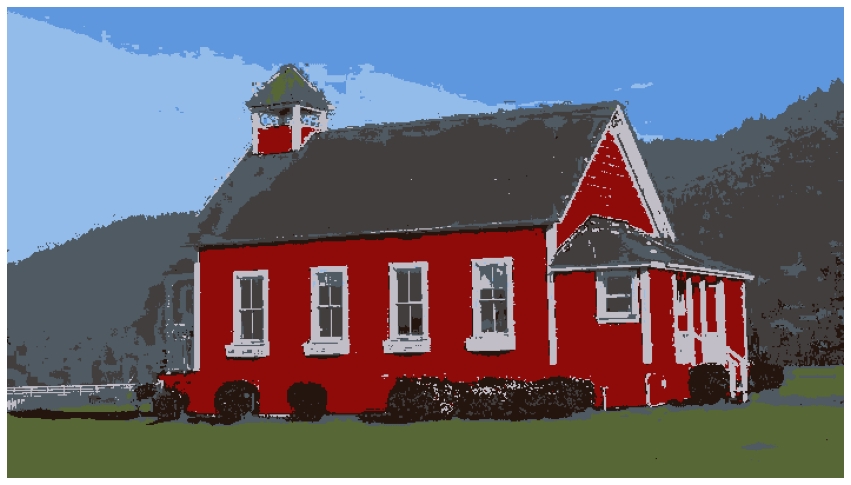

In [13]:
# CMYK - Cyan, Magenta, Yellow, Black
img_segment(img,cspace='CMYK')